In [1]:
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image

In [2]:
base_dir = 'E:\Conjunto_datos'

In [3]:
train_dir = os.path.join(base_dir, 'entrenamiento')
test_dir = os.path.join(base_dir, 'prueba')

train_adelate_dir = os.path.join(train_dir, 'adelante')
train_derecha_dir = os.path.join(train_dir, 'derecha')
train_izquierda_dir = os.path.join(train_dir, 'izquierda')

test_adelante_dir = os.path.join(test_dir, 'adelante')
test_derecha_dir = os.path.join(test_dir, 'derecha')
test_izquierda_dir = os.path.join(test_dir, 'izquierda')

In [4]:
print('total training adelante images :', len(os.listdir(train_adelate_dir)))
print('total training derecha images :', len(os.listdir(train_derecha_dir)))
print('total training izquierda images :', len(os.listdir(train_izquierda_dir)))

print('total test adelante images :', len(os.listdir(test_adelante_dir)))
print('total test derecha images :', len(os.listdir(test_derecha_dir)))
print('total test izquierda images :', len(os.listdir(test_izquierda_dir)))


total training adelante images : 1800
total training derecha images : 600
total training izquierda images : 600
total test adelante images : 600
total test derecha images : 200
total test izquierda images : 200


In [5]:
model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(240,320,1)),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(32, (2,2), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Dropout(0.5),       
tf.keras.layers.Flatten(),
tf.keras.layers.Dropout(0.5),     
tf.keras.layers.Dense(128, activation='relu'),        
tf.keras.layers.Dense(3, activation='softmax')
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 238, 318, 16)      160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 119, 159, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 118, 158, 32)      2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 59, 79, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 57, 77, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 38, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 28, 38, 64)        0

In [7]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [8]:

train_datagen = ImageDataGenerator( rescale = None )
test_datagen = ImageDataGenerator( rescale = None )


train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=10,
                                                    class_mode="categorical",
                                                    color_mode="grayscale",
                                                    shuffle = True,
                                                    target_size=(240,320))

validation_generator = test_datagen.flow_from_directory(test_dir,
                                                        batch_size=10,
                                                        class_mode="categorical",
                                                        color_mode="grayscale",
                                                        shuffle = True,
                                                        target_size = (240,320))

Found 3000 images belonging to 3 classes.
Found 1000 images belonging to 3 classes.


In [9]:
history = model.fit(train_generator,
                    steps_per_epoch=300, # 3000 imágenes = 10 * pasos
                    epochs=20,
                    validation_data=validation_generator,
                    validation_steps=100, # 1000 imágenes = 10 * pasos
                    verbose=1)

Epoch 1/20
300/300 [==============================] - 27s 73ms/step - loss: 1.7477 - accuracy: 0.8557 - val_loss: 0.5366 - val_accuracy: 0.8780
Epoch 2/20
300/300 [==============================] - 22s 72ms/step - loss: 0.3063 - accuracy: 0.9217 - val_loss: 0.6630 - val_accuracy: 0.8530
Epoch 3/20
300/300 [==============================] - 21s 71ms/step - loss: 0.2502 - accuracy: 0.9287 - val_loss: 0.5079 - val_accuracy: 0.9210
Epoch 4/20
300/300 [==============================] - 21s 71ms/step - loss: 0.1938 - accuracy: 0.9377 - val_loss: 0.5679 - val_accuracy: 0.8630
Epoch 5/20
300/300 [==============================] - 21s 71ms/step - loss: 0.2863 - accuracy: 0.9267 - val_loss: 0.5261 - val_accuracy: 0.8710
Epoch 6/20
300/300 [==============================] - 21s 71ms/step - loss: 0.1958 - accuracy: 0.9423 - val_loss: 0.6308 - val_accuracy: 0.9020
Epoch 7/20
300/300 [==============================] - 21s 71ms/step - loss: 0.1649 - accuracy: 0.9497 - val_loss: 0.4598 - val_accuracy:

Text(0.5, 1.0, 'Training and validation loss')

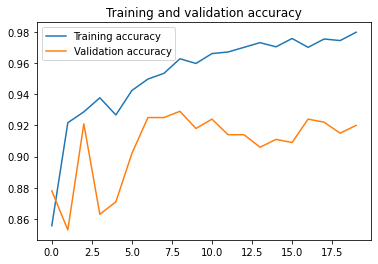

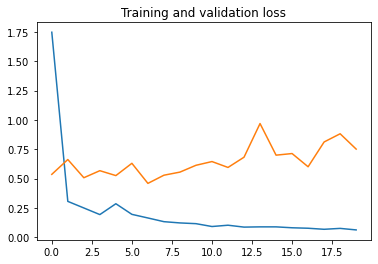

In [10]:
acc = history.history[ 'accuracy' ]
val_acc = history.history[ 'val_accuracy' ]
loss = history.history[ 'loss' ]
val_loss = history.history['val_loss' ]
epochs = range(len(acc)) # Get number of epochs
plt.plot ( epochs, acc , label='Training accuracy')
plt.plot ( epochs, val_acc , label='Validation accuracy')
plt.title ('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot ( epochs, loss )
plt.plot ( epochs, val_loss )
plt.title ('Training and validation loss' )

In [11]:
model.save('decision_model_5.h5')

In [2]:
new_model = keras.models.load_model('decision_model_5.h5')

In [4]:
from time import time
def count_elapsed_time(f):
    """
    Decorator.
    Execute the function and calculate the elapsed time.
    Print the result to the standard output.
    """
    def wrapper():
        # Start counting.
        start_time = time()
        # Take the original function's return value.
        ret = f()
        # Calculate the elapsed time.
        elapsed_time = time() - start_time
        print("Elapsed time: %0.10f seconds." % elapsed_time)
        return ret
    
    return wrapper

In [6]:
@count_elapsed_time
def test():
    img_path = "./2_depth.png"
    img = image.load_img(img_path,grayscale=True, target_size=(240,320))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    classes = new_model.predict(x)
    print(classes[0])
    print("Clase:",np.argmax(classes))
    plt.imshow(img,cmap='magma'); plt.title(f"Imagen", size=15)
    plt.show()


[9.9981934e-01 2.7899981e-05 1.5276014e-04]
Clase: 0


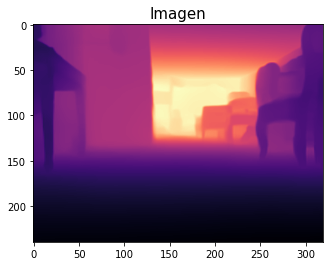

Elapsed time: 0.4786000252 seconds.


In [10]:
test()

In [2]:
import depth2 as dp

In [4]:
modelo = dp.model()

usage: ipykernel_launcher.py [-h] [--load_ckpt LOAD_CKPT] [--backbone BACKBONE]
ipykernel_launcher.py: error: unrecognized arguments: -f C:\Users\ferje\AppData\Roaming\jupyter\runtime\kernel-da4c517f-52d0-474f-9ae5-487bf426e107.json


SystemExit: 2

In [7]:
from lib.multi_depth_model_woauxi import RelDepthModel
from lib.net_tools import load_ckpt
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import cv2
import os
import argparse
import numpy as np
import torch


import matplotlib as mpl
import matplotlib.cm as cm



In [8]:
parser = argparse.ArgumentParser(description='Configs for LeReS')
parser.add_argument('--load_ckpt', default='./res50.pth')
parser.add_argument('--backbone', default='resnet50')
args = parser.parse_args()


usage: ipykernel_launcher.py [-h] [--load_ckpt LOAD_CKPT] [--backbone BACKBONE]
ipykernel_launcher.py: error: unrecognized arguments: -f C:\Users\ferje\AppData\Roaming\jupyter\runtime\kernel-da4c517f-52d0-474f-9ae5-487bf426e107.json


SystemExit: 2

[4.9450964e-04 9.9950552e-01 9.1742507e-09]
Clase: 1


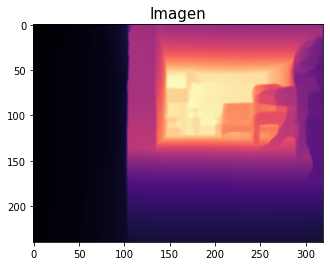

In [14]:
img_path = "./126r_depth.png"
img = image.load_img(img_path,grayscale=True, target_size=(240,320))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
classes = new_model.predict(x)
print(classes[0])
print("Clase:",np.argmax(classes))
plt.imshow(img,cmap='magma'); plt.title(f"Imagen", size=15)
plt.show()

[1.2275419e-05 9.4809982e-15 9.9998772e-01]
Clase: 2


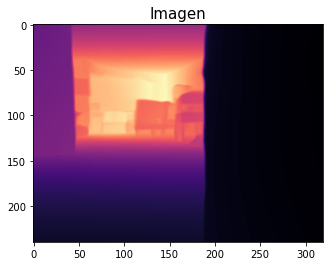

In [15]:
img_path = "./162l_depth.png"
img = image.load_img(img_path,grayscale=True,target_size=(240,320))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
classes = new_model.predict(x)
print(classes[0])
print("Clase:",np.argmax(classes))
plt.imshow(img,cmap='magma'); plt.title(f"Imagen", size=15)
plt.show()

[9.9999714e-01 9.2741800e-07 1.9057894e-06]
Clase: 0


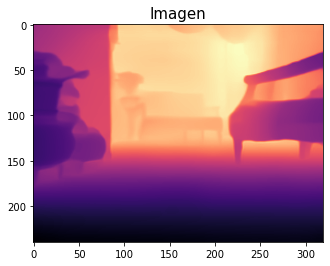

In [16]:
img_path = "./1027_depth.png"
img = image.load_img(img_path,grayscale=True, target_size=(240,320))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
classes = new_model.predict(x)
print(classes[0])
print("Clase:",np.argmax(classes))
plt.imshow(img,cmap='magma'); plt.title(f"Imagen", size=15)
plt.show()

[9.9715567e-01 6.1498956e-13 2.8443199e-03]
Clase: 0


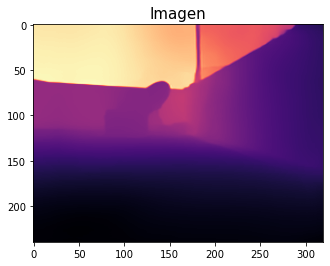

In [17]:
img_path = "./ade_depth.png"
img = image.load_img(img_path,grayscale=True, target_size=(240,320))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
classes = new_model.predict(x)
print(classes[0])
print("Clase:",np.argmax(classes))
plt.imshow(img,cmap='magma'); plt.title(f"Imagen", size=15)
plt.show()

[1.2904945e-12 2.2492251e-21 1.0000000e+00]
Clase: 2


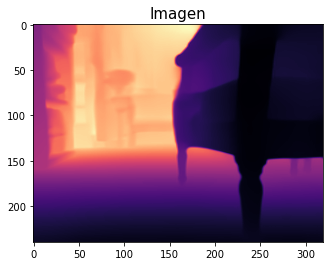

In [18]:
img_path = "./87l_depth.png"
img = image.load_img(img_path,grayscale=True, target_size=(240,320))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
classes = new_model.predict(x)
print(classes[0])
print("Clase:",np.argmax(classes))
plt.imshow(img,cmap='magma'); plt.title(f"Imagen", size=15)
plt.show()

[9.9967730e-01 3.2234081e-04 3.8410354e-07]
Clase: 0


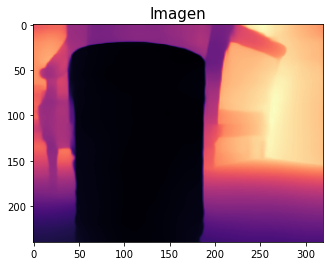

In [19]:
img_path = "./216r_depth.png"
img = image.load_img(img_path,grayscale=True, target_size=(240,320))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
classes = new_model.predict(x)
print(classes[0])
print("Clase:",np.argmax(classes))
plt.imshow(img,cmap='magma'); plt.title(f"Imagen", size=15)
plt.show()

[1.3196578e-07 9.9999988e-01 2.6305917e-15]
Clase: 1


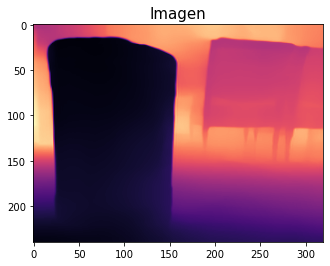

In [20]:
img_path = "./3644_der.png"
img = image.load_img(img_path,grayscale=True, target_size=(240,320))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
classes = new_model.predict(x)
print(classes[0])
print("Clase:",np.argmax(classes))
plt.imshow(img,cmap='magma'); plt.title(f"Imagen", size=15)
plt.show()

In [21]:
import numpy as np
import sklearn.metrics as metrics

In [22]:
test_data_generator = test_datagen.flow_from_directory(test_dir,
                                                        batch_size=10,
                                                        class_mode="categorical",
                                                        color_mode="grayscale",
                                                        shuffle = False,
                                                        target_size = (240,320))
test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)
predictions = model.predict_generator(test_data_generator, steps=test_steps_per_epoch)
predicted_classes = np.argmax(predictions, axis=1)

Found 1000 images belonging to 3 classes.


C:\Users\ferje\miniconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [23]:
true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys())   
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)   

              precision    recall  f1-score   support

    adelante       0.89      0.99      0.94       600
     derecha       0.98      0.82      0.89       200
   izquierda       0.99      0.81      0.89       200

    accuracy                           0.92      1000
   macro avg       0.95      0.87      0.91      1000
weighted avg       0.93      0.92      0.92      1000



In [24]:
import sklearn.metrics as metrics
from keras.wrappers.scikit_learn import KerasClassifier

confusion_matrix = metrics.confusion_matrix(y_true=true_classes, y_pred=predicted_classes)
print(confusion_matrix)

[[594   4   2]
 [ 36 164   0]
 [ 38   0 162]]


In [25]:
print(class_labels)

['adelante', 'derecha', 'izquierda']


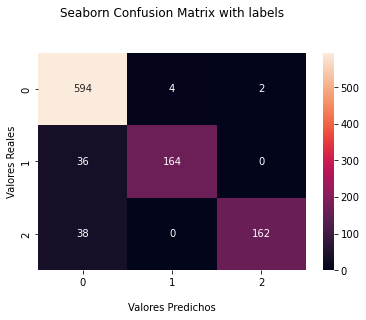

In [26]:
import seaborn as sns

ax = sns.heatmap(confusion_matrix, annot=True,fmt='g')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nValores Predichos')
ax.set_ylabel('Valores Reales');


## Display the visualization of the Confusion Matrix.
plt.show()

In [27]:
print(true_classes)
print(predicted_classes)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 